In [42]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

data = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv")

In [43]:
print 'Data Columns'
print dir(data)[:111]

Data Columns
['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter', 'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName', 'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation', 'CodeEventBootcamp', 'CodeEventCoffee', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWomenCode', 'CodeEventWorkshop', 'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting', 'Gender', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'Income', 'IsEthnicMinority', 'IsReceiveDiabilitiesBenefits', 'IsSoftwareDev',

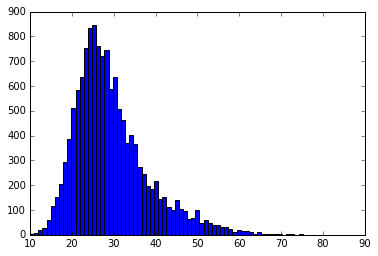

In [44]:
plt.hist(data.Age.dropna(), bins=77)
plt.show()

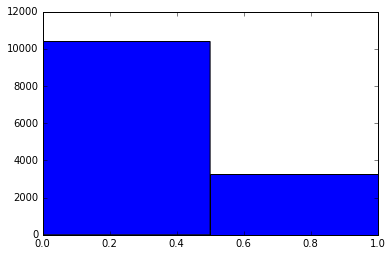

In [45]:
plt.hist(data.IsEthnicMinority.dropna(), bins=2)
plt.show()

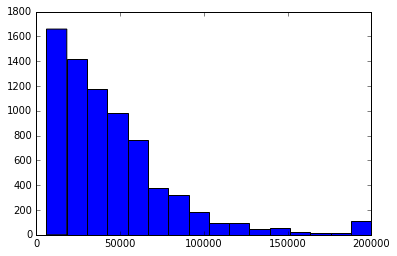

In [46]:
plt.hist(data.Income.dropna(), bins=16)
plt.show()

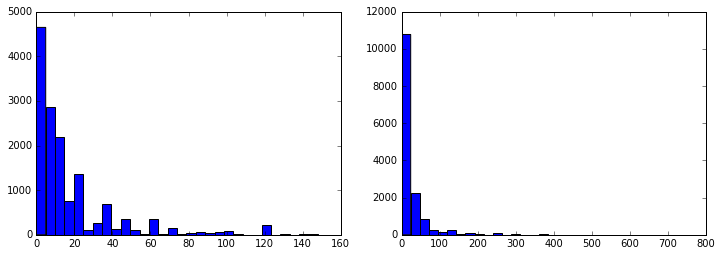

In [58]:
plt.figure(figsize=(12,4))

plt.subplot(121)
d = data.MonthsProgramming.dropna()
lessThan150 = np.array(filter(lambda x:x<150, d))

plt.hist(lessThan150, bins=30)
plt.subplot(122)
plt.hist(d, bins=30)
plt.show()

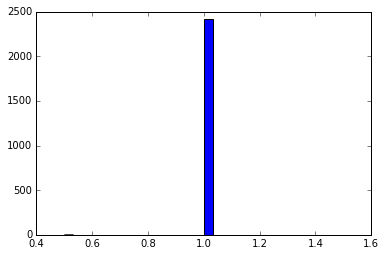

In [48]:
plt.hist(data.CodeEventHackathons.dropna(), bins=30)
plt.show()

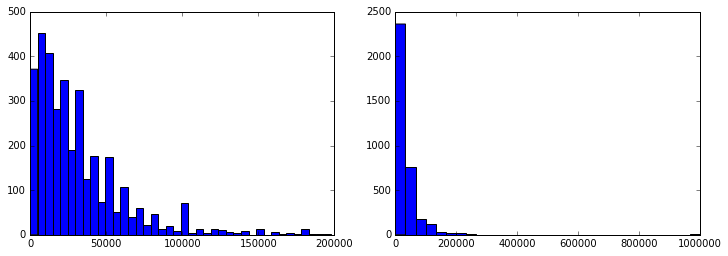

In [61]:
plt.figure(figsize=(12,4))

plt.subplot(121)
d = data.StudentDebtOwe.dropna()
lessThan200k = np.array(filter(lambda x:x<200000, d))

plt.hist(lessThan200k, bins=40)
plt.subplot(122)
plt.hist(d, bins=30)
plt.show()